SuperMarket Veri Analizi


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




In [3]:
df = pd.read_csv("supermarket_sales.csv", sep = ",")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
#Eksik Verilerin Giderilmesi
missing_data = df.isnull().sum()

missing_data[missing_data > 0]

Series([], dtype: int64)

In [7]:
# Aykırı değerleri belirlemek için IQR yöntemini kullanalım

# Sadece sayısal sütunları seçelim
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Aykırı değerlerin sayısını bulalım
outliers = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 =df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Aykırı değerleri tespit et
    outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

outliers


{'Unit price': 0,
 'Quantity': 0,
 'Tax 5%': 9,
 'Total': 9,
 'cogs': 9,
 'gross margin percentage': 0,
 'gross income': 9,
 'Rating': 0}

In [5]:


import pandas as pd

# Tarih sütununu datetime formatına dönüştürme
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Saat sütununu datetime formatına dönüştürme (saat, dakika ve saniye ile)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Kategorik değişkenleri one-hot encoding ile sayısal hale getirme
df_encoded = pd.get_dummies(df, columns=['City', 'Gender', 'Customer type', 'Product line', 'Payment'], drop_first=True)

# Diğer gerekli formatlamalar: sayısal değerlerin kontrolü
df_encoded['Unit price'] = df_encoded['Unit price'].astype(float)
df_encoded['Quantity'] = df_encoded['Quantity'].astype(int)

# Formatlanmış veri setinin ilk birkaç satırını göster
df_encoded





,Invoice ID,Branch,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,...,City_Yangon,Gender_Male,Customer type_Normal,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,750-67-8428,A,74.69,7,26.1415,548.9715,2019-01-05,NaT,522.83,4.761905,...,True,False,False,False,False,True,False,False,False,True
1,226-31-3081,C,15.28,5,3.8200,80.2200,2019-03-08,NaT,76.40,4.761905,...,False,False,True,False,False,False,False,False,False,False
2,631-41-3108,A,46.33,7,16.2155,340.5255,2019-03-03,NaT,324.31,4.761905,...,True,True,True,False,False,False,True,False,True,False
3,123-19-1176,A,58.22,8,23.2880,489.0480,2019-01-27,NaT,465.76,4.761905,...,True,True,False,False,False,True,False,False,False,True
4,373-73-7910,A,86.31,7,30.2085,634.3785,2019-02-08,NaT,604.17,4.761905,...,True,True,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,40.35,1,2.0175,42.3675,2019-01-29,NaT,40.35,4.761905,...,False,True,True,False,False,True,False,False,False,True
996,303-96-2227,B,97.38,10,48.6900,1022.4900,2019-03-02,NaT,973.80,4.761905,...,False,False,True,False,False,False,True,False,False,True
997,727-02-1313,A,31.84,1,1.5920,33.4320,2019-02-09,NaT,31.84,4.761905,...,True,True,False,False,True,False,False,False,False,False
998,347-56-2442,A,65.82,1,3.2910,69.1110,2019-02-22,NaT,65.82,4.761905,...,True,True,True,False,False,False,True,False,False,False


In [23]:
#İstatistiksel Verileri Hesaplama
df_encoded.describe().T

,count,mean,min,25%,50%,75%,max,std
Unit price,1000.0,55.67213,10.08,32.875,55.23,77.935,99.96,26.494628
Quantity,1000.0,5.51,1.0,3.0,5.0,8.0,10.0,2.923431
Tax 5%,1000.0,15.379369,0.5085,5.924875,12.088,22.44525,49.65,11.708825
Total,1000.0,322.966749,10.6785,124.422375,253.848,471.35025,1042.65,245.885335
Date,1000,2019-02-14 00:05:45.600000,2019-01-01 00:00:00,2019-01-24 00:00:00,2019-02-13 00:00:00,2019-03-08 00:00:00,2019-03-30 00:00:00,NaN
Time,0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
cogs,1000.0,307.58738,10.17,118.4975,241.76,448.905,993.0,234.17651
gross margin percentage,1000.0,4.761905,4.761905,4.761905,4.761905,4.761905,4.761905,0.0
gross income,1000.0,15.379369,0.5085,5.924875,12.088,22.44525,49.65,11.708825
Rating,1000.0,6.9727,4.0,5.5,7.0,8.5,10.0,1.71858


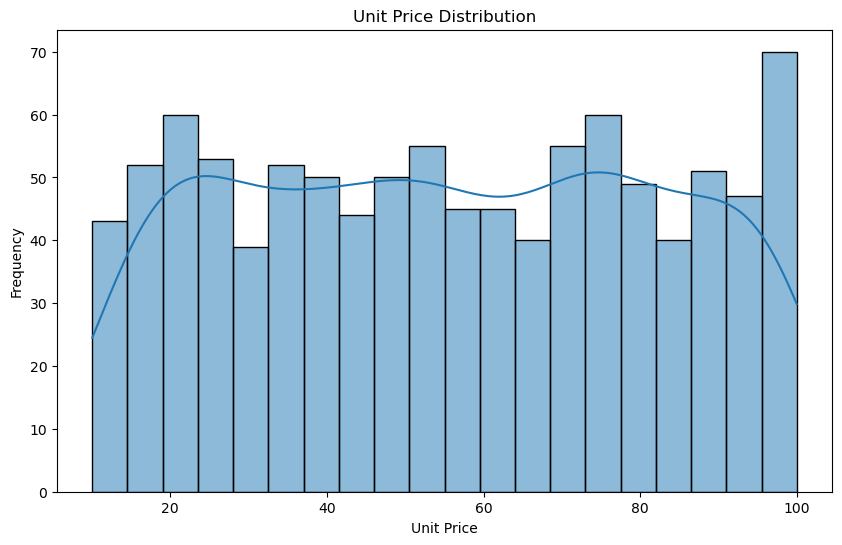

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram - Unit price sütunu
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['Unit price'], bins=20, kde=True)
plt.title('Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


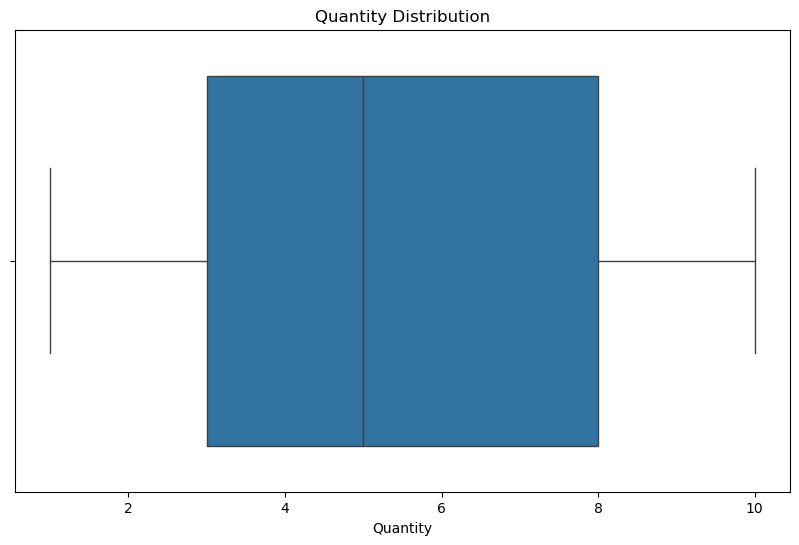

In [9]:
# Kutu Grafiği - Quantity sütunu
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_encoded['Quantity'])
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.show()


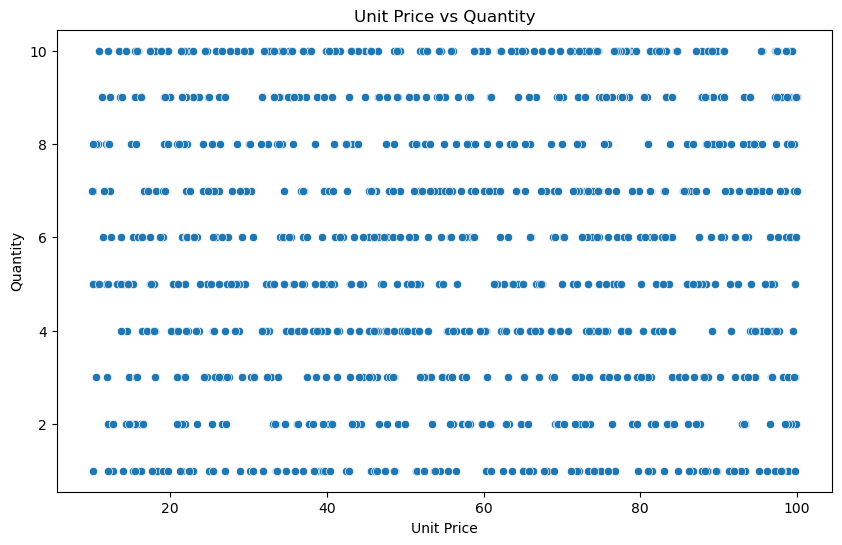

In [28]:
# Dağılım Grafiği - Unit Price vs Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_encoded['Unit price'], y=df_encoded['Quantity'])
plt.title('Unit Price vs Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()


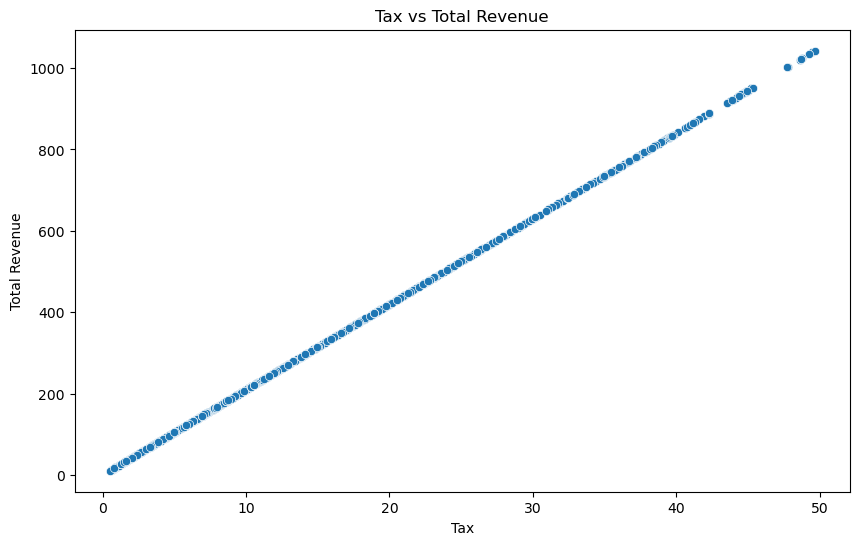

In [10]:
# Çift Değişkenli Dağılım Grafiği - Tax ve Total
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_encoded['Tax 5%'], y=df_encoded['Total'])
plt.title('Tax vs Total Revenue')
plt.xlabel('Tax')
plt.ylabel('Total Revenue')
plt.show()


In [13]:
# Sadece sayısal değişkenleri seç
numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesapla
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini göster
correlation_matrix



,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Tax 5%,0.633962,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


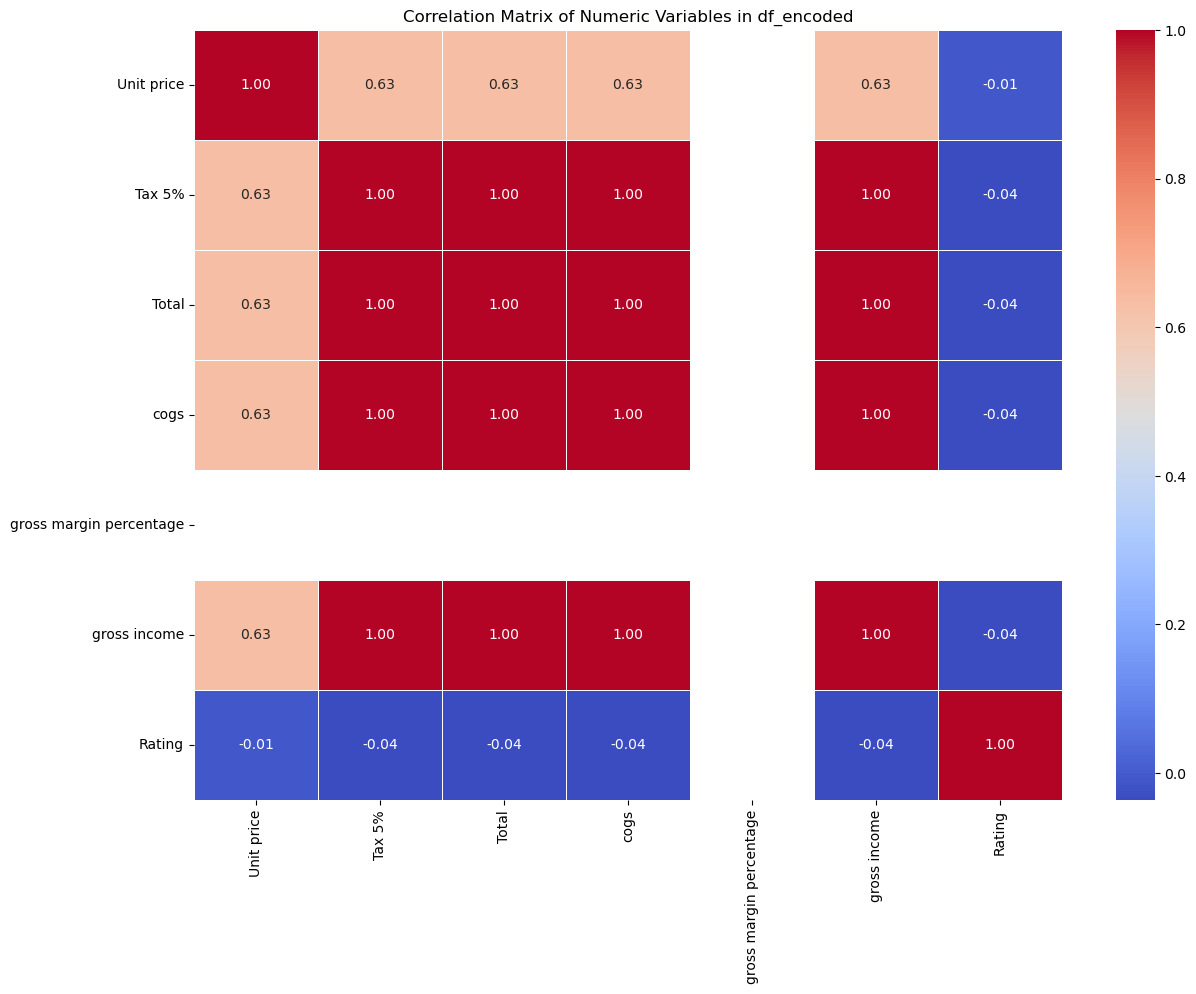

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisi için ısı haritası oluşturma
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables in df_encoded')
plt.show()


In [15]:
# Korelasyon matrisinin mutlak değerlerini al
abs_corr_matrix = correlation_matrix.abs()

# Eşik değerini belirle (örneğin, 0.5'ten büyük olan korelasyonları göster)
strong_corrs = abs_corr_matrix[abs_corr_matrix > 0.5].stack().reset_index()
strong_corrs = strong_corrs[strong_corrs['level_0'] != strong_corrs['level_1']]  # Aynı değişkenler arası korelasyonları çıkar
strong_corrs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_corrs.drop_duplicates(inplace=True)

# Güçlü korelasyonları göster
strong_corrs


,Variable 1,Variable 2,Correlation
1,Unit price,Tax 5%,0.633962
2,Unit price,Total,0.633962
3,Unit price,cogs,0.633962
4,Unit price,gross income,0.633962
5,Tax 5%,Unit price,0.633962
7,Tax 5%,Total,1.000000
8,Tax 5%,cogs,1.000000
9,Tax 5%,gross income,1.000000
10,Total,Unit price,0.633962
11,Total,Tax 5%,1.000000


In [18]:
import pandas as pd

# Sadece sayısal değişkenleri seç
numeric_df_encoded = df_encoded.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini tekrar hesapla
correlation_matrix = numeric_df_encoded.corr()

# Korelasyonu en yüksek olan özellikleri seçelim
strong_corr = correlation_matrix['Total'].abs().sort_values(ascending=False)

# Örneğin, korelasyonu 0.5'ten büyük olan özellikleri seçelim
selected_features = strong_corr[strong_corr > 0.5].index.tolist()

# Seçilen özelliklere göre yeni bir veri seti oluşturma
df_selected = numeric_df_encoded[selected_features]

# Seçilen özelliklerle yeni veri setinin ilk birkaç satırını göster
df_selected.head()


,Total,Tax 5%,gross income,cogs,Unit price
0,548.9715,26.1415,26.1415,522.83,74.69
1,80.2200,3.8200,3.8200,76.40,15.28
2,340.5255,16.2155,16.2155,324.31,46.33
3,489.0480,23.2880,23.2880,465.76,58.22
4,634.3785,30.2085,30.2085,604.17,86.31


In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalizasyon
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

# Standardizasyon (isteğe bağlı, standardize etmek isterseniz)
# scaler = StandardScaler()
# df_standardized = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

df_normalized.head()


,Total,Tax 5%,gross income,cogs,Unit price
0,0.521616,0.521616,0.521616,0.521616,0.718847
1,0.067387,0.067387,0.067387,0.067387,0.057855
2,0.319628,0.319628,0.319628,0.319628,0.403316
3,0.463549,0.463549,0.463549,0.463549,0.535603
4,0.604377,0.604377,0.604377,0.604377,0.848131


In [20]:
# Ürün başına gelir (Total / Quantity)
df_encoded['Revenue per Product'] = df_encoded['Total'] / df_encoded['Quantity']

# Brüt kar marjı (Gross income / Total)
df_encoded['Gross Profit Margin'] = df_encoded['gross income'] / df_encoded['Total']

# Yeni özelliklerle güncellenmiş veri seti
df_encoded[['Revenue per Product', 'Gross Profit Margin']].head()


,Revenue per Product,Gross Profit Margin
0,78.4245,0.047619
1,16.0440,0.047619
2,48.6465,0.047619
3,61.1310,0.047619
4,90.6255,0.047619


In [21]:
# Yeni özelliklerle birlikte anlamlı sayılabilecek tüm özellikleri seçelim
final_features = df_encoded[['Total', 'Quantity', 'Revenue per Product', 'Gross Profit Margin', 'Unit price', 'cogs', 'gross income']]

final_features.head()


,Total,Quantity,Revenue per Product,Gross Profit Margin,Unit price,cogs,gross income
0,548.9715,7,78.4245,0.047619,74.69,522.83,26.1415
1,80.2200,5,16.0440,0.047619,15.28,76.40,3.8200
2,340.5255,7,48.6465,0.047619,46.33,324.31,16.2155
3,489.0480,8,61.1310,0.047619,58.22,465.76,23.2880
4,634.3785,7,90.6255,0.047619,86.31,604.17,30.2085


In [9]:
import pandas as pd

# Sadece sayısal sütunları seçme
df_numeric = df_encoded.select_dtypes(include=['number'])

# Sayısal sütunları kontrol edelim
print("Sayısal sütunlar:", df_numeric.columns)

from sklearn.model_selection import train_test_split

# Hedef değişkeni belirleme (Örnek olarak 'Total' sütunu kullanılıyor)
X = df_numeric.drop(columns='Total')  # Özellikler
y = df_numeric['Total']  # Hedef değişken

# Eğitim ve test veri setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Modeli tanımlama
model = RandomForestRegressor(random_state=42)

# Hiperparametre aralıklarını tanımlama
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hiperparametre optimizasyonu için GridSearchCV kullanımı
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# En iyi parametreler
best_params = grid_search.best_params_
print("En iyi hiperparametreler:", best_params)



Sayısal sütunlar: Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')
Fitting 3 folds for each of 81 candidates, totalling 243 fits
En iyi hiperparametreler: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Sadece sayısal sütunları seçme
df_numeric = df_encoded.select_dtypes(include=['number'])

# Hedef değişkeni belirleme (Örnek olarak 'Total' sütunu kullanılıyor)
X = df_numeric.drop(columns='Total')  # Özellikler
y = df_numeric['Total']  # Hedef değişken

# Eğitim ve test veri setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli tanımlama
model = RandomForestRegressor(random_state=42)

# Hiperparametre aralıklarını tanımlama
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hiperparametre optimizasyonu için GridSearchCV kullanımı
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# En iyi parametreler
best_params = grid_search.best_params_
print("En iyi hiperparametreler:", best_params)

# En iyi parametrelerle modeli yeniden eğitme
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Tahminler yapma
y_pred = best_model.predict(X_test)

# Model performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
En iyi hiperparametreler: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 1.1572027313840594
R-squared: 0.9999822130278881
